In [1]:
#This is the python file for testing
from QPE import QPhe_qiskit
from qiskit.circuit.library.standard_gates import HGate

In [2]:
qphe=QPhe_qiskit(3, 3)
qphe.set_unitary([(HGate(), [0])])
qphe.construct_circuit()
qphe.compute_result()  

In [3]:
circuit=qphe.circuit

C:\Users\73747\PycharmProjects\DynamicCircuit\yalehack\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


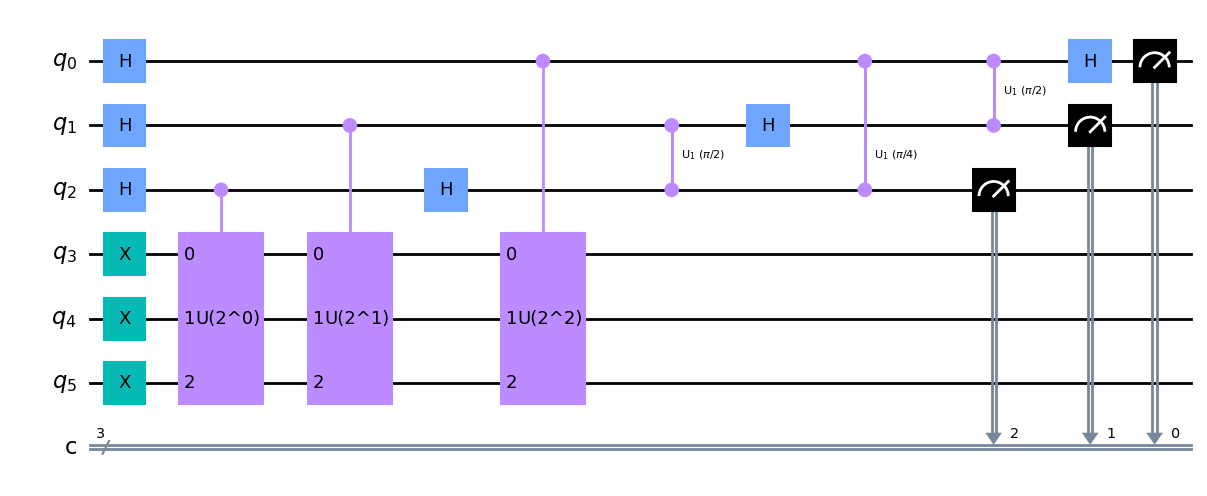

In [4]:
circuit.draw(output='mpl')

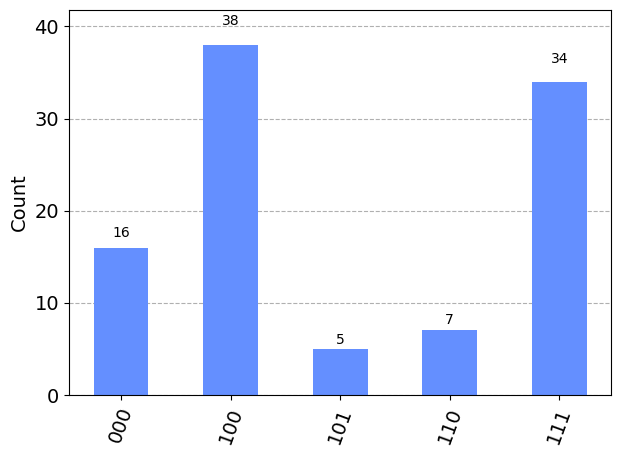

In [5]:
qphe.show_measure_all(100)

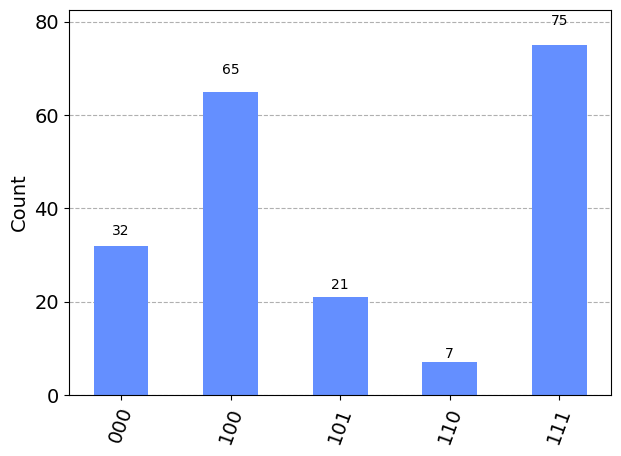

In [6]:
qphe.show_measure_all(200)

In [8]:
from noise import *

noise_model=construct_bitflip_noise_model(0.1, 0.1, 0.1)

NameError: name 'construct_noise_model' is not defined

NNN


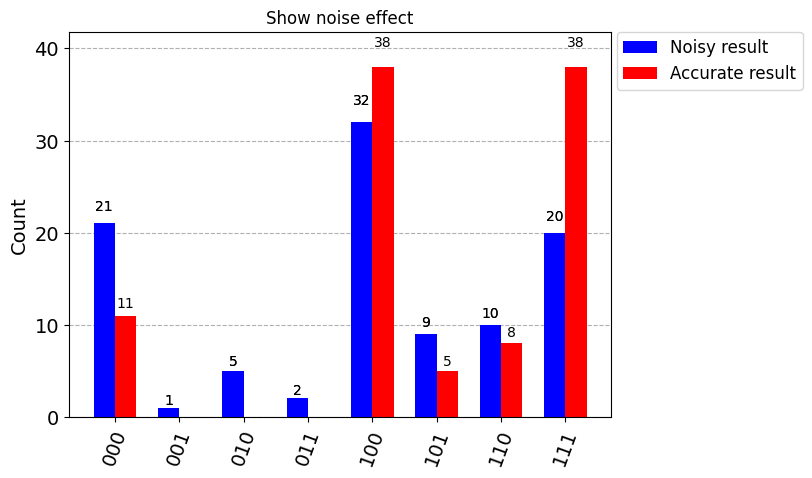

In [9]:
qphe.add_noise_model(noise_model)
qphe.show_noise_effect(100)

# Example of quantum if

C:\Users\73747\PycharmProjects\DynamicCircuit\yalehack\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


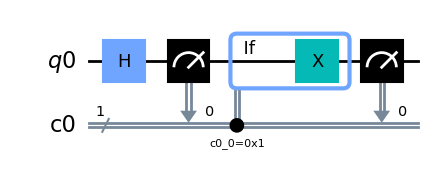

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)):
    circuit.x(q0)
circuit.measure(q0, c0)
circuit.draw("mpl")
 

# Example of quantum if Else

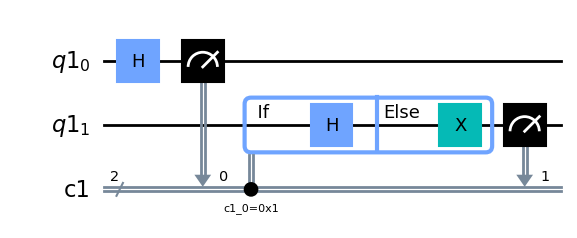

In [2]:

# example output counts: {'0': 1024}



qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)
 
circuit.draw("mpl")
 
# example output counts: {'01': 260, '11': 272, '10': 492}





# Example of quantum if conditioned on multiple bits

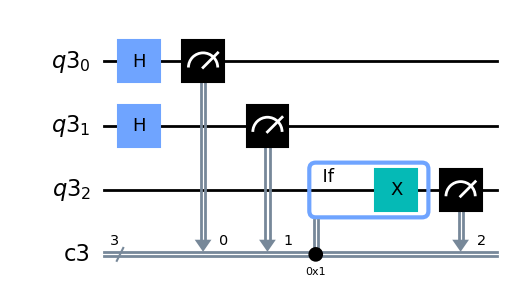

In [4]:

qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.if_test((clbits, 0b001)):
    circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 

# Example of Switch statement

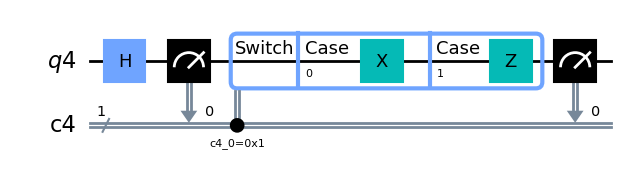

In [5]:

# example output counts: {'101': 269, '011': 260, '000': 252, '010': 243}


qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.switch(c0) as case:
    with case(0):
        circuit.x(q0)
    with case(1):
        circuit.z(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 

# Example of Switch statement 2

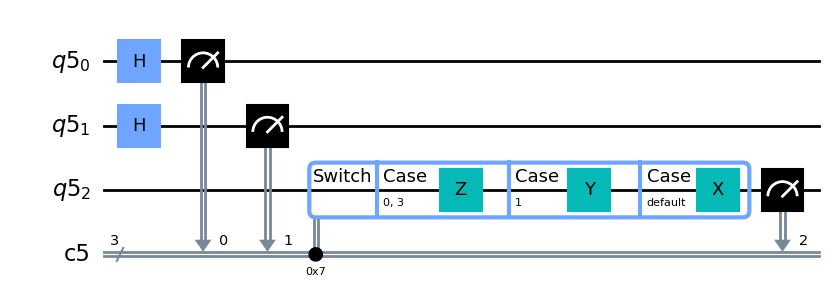

In [6]:

# example output counts: {'1': 1024}

qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.switch(clbits) as case:
    with case(0b000, 0b011):
        circuit.z(q2)
    with case(0b001):
        circuit.y(q2)
    with case(case.DEFAULT):
        circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 

# Example of for loop

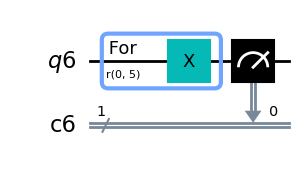

In [7]:

# example output counts: {'101': 267, '110': 249, '011': 265, '000': 243}


qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
with circuit.for_loop(range(5)) as _:
    circuit.x(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 

# Example of while

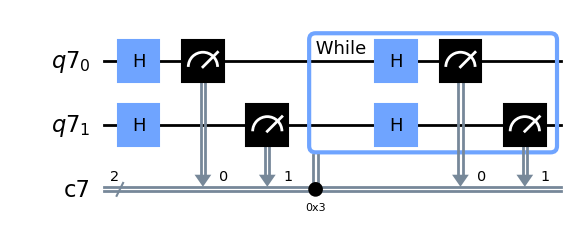

In [8]:

# example output counts: {'1': 1024}


qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
 
q0, q1 = qubits
c0, c1 = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.while_loop((clbits, 0b11)):
    circuit.h([q0, q1])
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)
 
circuit.draw("mpl")
 
# example output counts: {'01': 334, '10': 368, '00': 322}